In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
csv = "https://raw.githubusercontent.com/omer770/Predict_insurance_charges/main/insurance_data.csv"

In [5]:
df=pd.read_csv(csv)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


##Handling Null

In [6]:
df.isnull().sum().sort_values(ascending = False)

age         4
bmi         2
sex         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si=SimpleImputer(missing_values = np.nan, strategy="median")

In [9]:
si.fit(df[['age','bmi']])

SimpleImputer(strategy='median')

In [10]:
df[['age', 'bmi']] = si.transform(df[['age', 'bmi']])

##Data Visualization

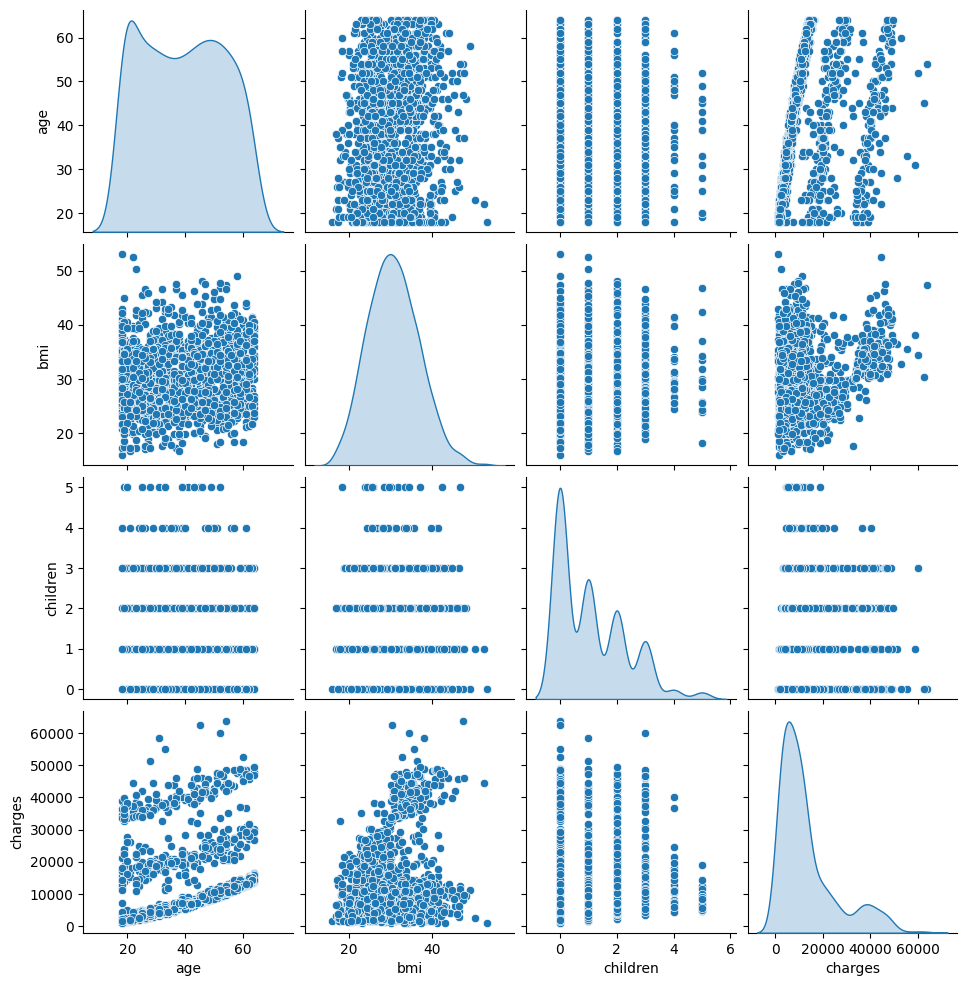

In [11]:
sns.pairplot(data=df, diag_kind='kde')

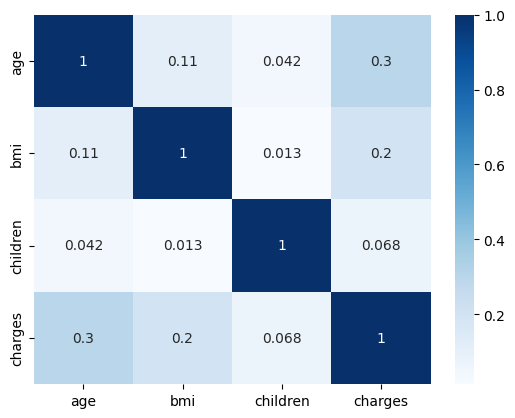

In [12]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cmap='Blues', annot=True)
plt.show()

###For objectes:

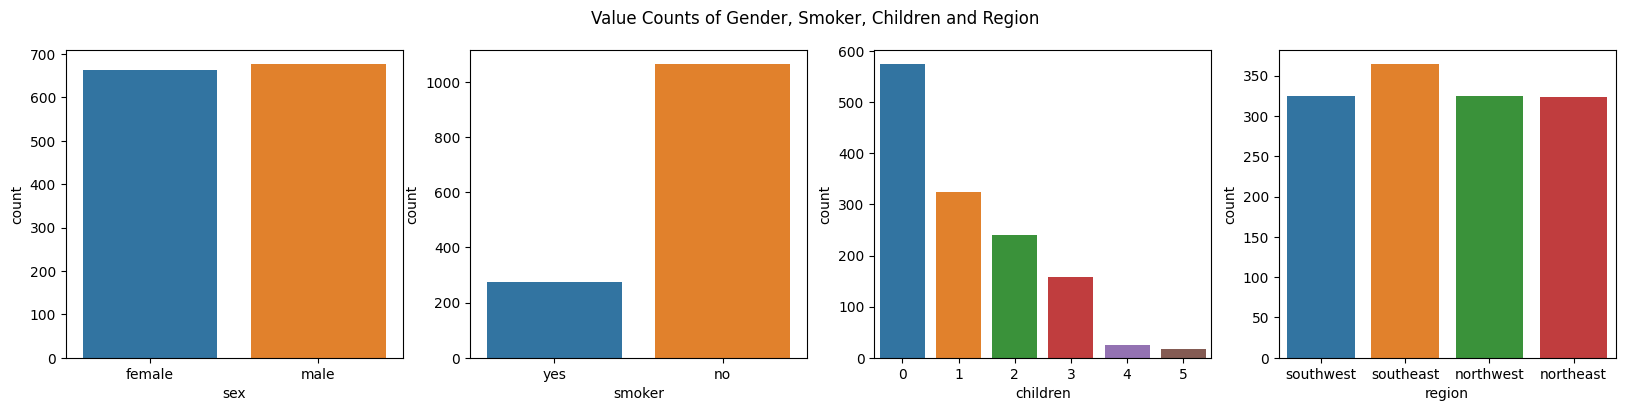

In [13]:
fig, ax2 = plt.subplots(1,4,  figsize=(20,4))
fig.suptitle('Value Counts of Gender, Smoker, Children and Region')
sns.countplot(ax=ax2[0], x=df.sex)
sns.countplot(ax=ax2[1], x=df.smoker)
sns.countplot(ax=ax2[2], x=df.children)
sns.countplot(ax=ax2[3], x=df.region)
plt.show()

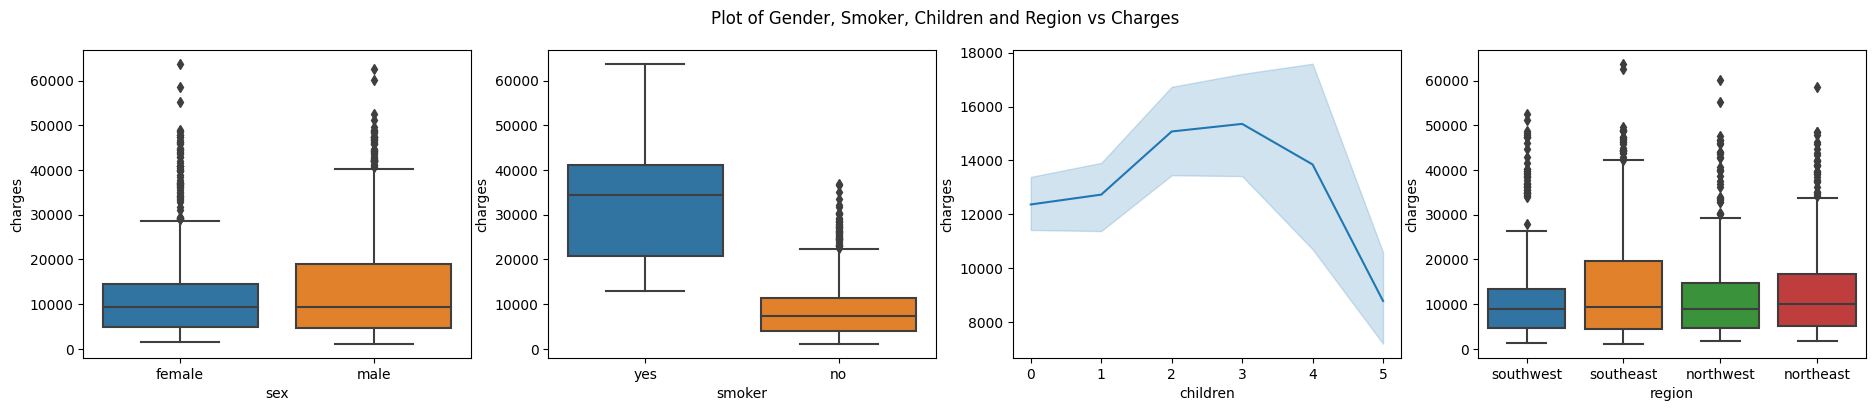

In [14]:
fig, ax2 = plt.subplots(1,4,  figsize=(23,4))
fig.suptitle('Plot of Gender, Smoker, Children and Region vs Charges',)
sns.boxplot(ax=ax2[0], x=df.sex, y=df.charges)
sns.boxplot(ax=ax2[1], x=df.smoker, y=df.charges)
sns.lineplot(ax=ax2[2], x=df.children, y=df.charges)
sns.boxplot(ax=ax2[3], x=df.region, y=df.charges)
plt.show()

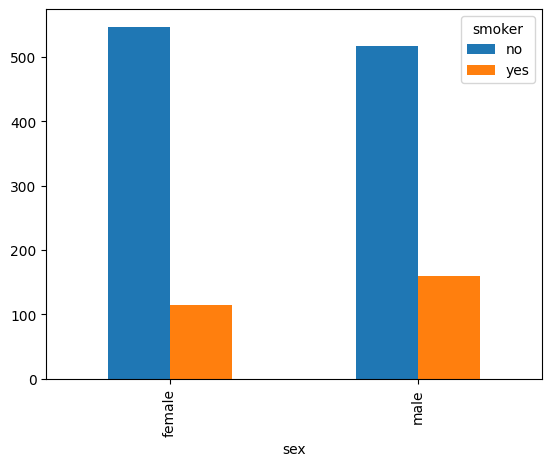

In [15]:
pd.crosstab(df.sex, df.smoker).plot(kind="bar")
plt.show()

##Feature Encoding

In [ ]:
#One hot encoding
region=pd.get_dummies(df.region, prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)

In [ ]:
#Label Encoding
df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'location_northeast', 'location_northwest', 'location_southeast',
       'location_southwest'],
      dtype='object')

## Feature Selection and Scaling

In [ ]:
y=df.charges.values
X=df[['age', 'bmi', 'smoker', 'children', 'location_northeast', 'location_northwest', 'location_southeast']]

In [ ]:
X.head()

,age,bmi,smoker,children,location_northeast,location_northwest,location_southeast
0,19.0,27.900,1,0,0,0,0
1,18.0,33.770,0,1,0,0,1
2,28.0,33.000,0,3,0,0,1
3,33.0,22.705,0,0,0,1,0
4,32.0,28.880,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling numeric features using sklearn StandardScalar
numeric=['age', 'bmi', 'children']
sc= StandardScaler()

In [ ]:
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

##Linear Regression and DecisionTrees

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.7163778320561373, 4321.670792075821, 6391.5192882465535)

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.6578669305316819, 3493.041884160448, 7019.910005307661)